# Module 1 - Introducing Libraries: NumPy and Pandas
## Pandas Part 1

### Introduction

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. You have found out that Austin has one of the largest no-kill animal shelters in the country, and they keep meticulous track of animals that have been taken in and released. However, it is a large file, the online visualization tools provided are terrible, the data is sorted as strings, and the file holds an overwhelming amount  of information. Is there an easy way to look at this data? Can we do this with base Python? Is there a better way?


#### _Our goals today are to be able to_: <br/>

- Identify and import Python libraries
- Identify differences between NumPy and base Python in usage and operation
- Import/read data using Pandas
- Identify Pandas objects and manipulate Pandas objects by index and columns
- Filter data using Pandas

#### _Big questions for this lesson_: <br/>
- What is a package, what do packages do, and why might we want to use them?
- When do we want to use NumPy versus Pandas?
- What are the advantages of using Pandas?

### Activation:

![excel](excelpic.jpg)

Most people have used Microsoft Excel or Google sheets. But what are the limitations of excel?

- [Take a minute to read this article](https://www.bbc.com/news/magazine-22223190)
- make a list of problems excel presents

How is using python different?

### 1. Importing Python Libraries


In an earlier lesson, we wrote a function to calculate the mean of an list. That was **tedious**.

Thankfully, other people have wrote and optimized functions and wrapped them into `libraries` we can then call and use in our analysis.

![numpy](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/master/images/numpy.png)

[NumPy](https://www.numpy.org/) is the fundamental package for scientific computing with Python. 


To import a package type `import` followed by the name of the library as shown below.

In [3]:
import numpy 

x=numpy.array([1,2,3])
print(x)

[1 2 3]


In [4]:
#most packages have a standard way to import them
import numpy as np

y=np.array([4,5,6])
print(y)

[4 5 6]


Because of numpy we can now get the **mean** and other quick math of lists and arrays.

In [5]:
ex2 = np.array([4,3,25,40,62,20.0])
ex2

array([ 4.,  3., 25., 40., 62., 20.])

In [6]:
example = [4,3,25,40,62,"20"]
print(np.mean(example))

TypeError: cannot perform reduce with flexible type

In [ ]:
int(37.3)

In [7]:
import math

In [8]:
math.floor(37.3)

37

Now let's import some other packages. We will cover in more detail some fun options for numpy later.

In [9]:
import scipy  # no nickname
import pandas as pd  # common nickname
import matplotlib as mpl  # non common nickname

In [10]:
#sometimes we will want to import a specific module from a library
import matplotlib.pyplot as plt  # common nickname

plt.plot(x,y)

[]

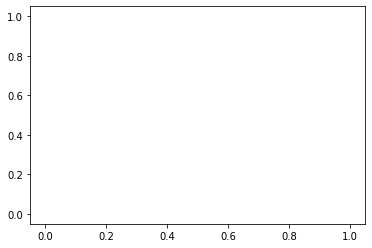

In [11]:
# interactive pop up for method documentation
# is () with a shift tab inside of ()
plt.plot()

In [12]:
# or you can print out the whole entire documentation
# help(plt.plot)

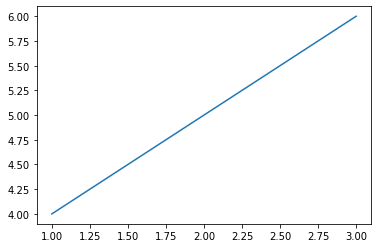

In [13]:
#OR we can also import it this way

from matplotlib import pyplot as plt 
plt.plot(x,y)

Try importing the seaborn library as ['sns'](https://en.wikipedia.org/wiki/Sam_Seaborn) which is the convention.

In [14]:
#type your code here!
import seaborn as sns

#### Helpful links: library documenation

Libraries have associated documentation to explain how to use the different tools included in a library.

- [NumPy](https://docs.scipy.org/doc/numpy/)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/)
- [Pandas](http://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)

### 2. NumPy versus base Python

Now that we know libraries exist, why do we want to use them? Let us examine a comparison between base Python and Numpy.

Python has lists and normal python can do basic math. NumPy, however, has the helpful objects called arrays.

Numpy has a few advantages over base Python which we will look at.

In [15]:
import numpy

In [16]:
import numpy as np

In [17]:
names_list=['Bob','John','Sally']
names_array=numpy.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [18]:
names_array

chararray(['Bob', 'John', 'Sally'], dtype='<U5')

In [19]:
names_array + "_totally!"

chararray(['Bob_totally!', 'John_totally!', 'Sally_totally!'],
          dtype='<U14')

In [20]:
names_array

chararray(['Bob', 'John', 'Sally'], dtype='<U5')

In [21]:
food_array = np.char.array(["pizza", "pasta", "green chili stew"])
food_array

chararray(['pizza', 'pasta', 'green chili stew'], dtype='<U16')

In [22]:
food_array + "-yum! :)"

chararray(['pizza-yum! :)', 'pasta-yum! :)', 'green chili stew-yum! :)'],
          dtype='<U24')

Arrays can have many dimensions

In [23]:
food_array

chararray(['pizza', 'pasta', 'green chili stew'], dtype='<U16')

In [24]:
food_array.shape

(3,)

Why the negative -1?

This [seems like the best answer on why -1](https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape).

In [25]:
food_reshape = food_array.reshape(-1, 1)

In [26]:
food_reshape.shape

(3, 1)

In [27]:
food_reshape

chararray([['pizza'],
           ['pasta'],
           ['green chili stew']], dtype='<U16')

In [28]:
food_array

chararray(['pizza', 'pasta', 'green chili stew'], dtype='<U16')

In [29]:
# Make a list and an array of three numbers

#your code here
numbers_list = [17, 21, 65]
numbers_array = np.array([17, 21, 65])

In [30]:
# divide your array by 2

numbers_array/2

array([ 8.5, 10.5, 32.5])

In [31]:
# divide your list by 2

numbers_list/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

Numpy arrays support the \_div\_ operator while python lists do not. There are other things that make it useful to utilize numpy over base python for evaluating data.

Below, you will find a piece of code we will use to compare the speed of operations on a list and operations on an array. In this speed test, we will use the library [time](https://docs.python.org/3/library/time.html).

In [32]:
import time
import numpy as np

size_of_vec = 1000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X))]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.0006647109985351562 numpy: 4.1961669921875e-05
Numpy is in this example 15.840909090909092 times faster!


In pairs, run the speed test with a different number, and share your results with the class.

### 3. Importing and reading data with ACTUAL LITERAL Pandas!


![pandas-lib](https://pandas.pydata.org/_static/pandas_logo.png)

![alt text](https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg "https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg")

#### Let's use pandas to read some csv files so we can interact with them.

First, let's check which directory we are in so the files we expect to see are there.

In [ ]:
!pwd

In [ ]:
!pwd
!ls -la

Did you see that? It is possible to run terminal commands from jupyter notebook by using `!`

In [33]:
import pandas as pd
example_csv=pd.read_csv('example1.csv')

There are also `read_excel` and many other pandas `read` functions.

In [34]:
example_csv.head() #this is an example template of how to read a csv

,Title1,Title2,Title3
0,one,two,three
1,example1,example2,example3


Try loading in the example file in the directory called 'made_up_jobs.csv' using pandas.

In [ ]:
#read in your csv here!
jobs_df = pd.read_csv("made_up_jobs.csv")


#remember that it's nice to be able to look at your data, so let's do that here, too.
jobs_df.head()

In [63]:
jobs_df.shape

NameError: name 'jobs_df' is not defined

You can also load in data by using the url of an associated dataset.

In [64]:
!wget https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD
    
    #how to directly download the data

--2019-08-13 10:00:47--  https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.1’

rows.csv?accessType     [           <=>      ]  14.24M  1.40MB/s    in 12s     

2019-08-13 10:01:00 (1.15 MB/s) - ‘rows.csv?accessType=DOWNLOAD.1’ saved [14931087]



In [2]:
!ls 

LICENSE                      index.ipynb
README.md                    made_up_jobs.csv
example1.csv                 rows.csv?accessType=DOWNLOAD


In [65]:
!mv "rows.csv?accessType=DOWNLOAD" = shelter_data
#renamed through (move - !mv) that points to the local disk where the data exists

usage: mv [-f | -i | -n] [-v] source target
       mv [-f | -i | -n] [-v] source ... directory


In [58]:
#shelter_data=pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD') 
#this link is copied directly from the download option for CSV 

In [53]:
import pandas as pd

In [66]:
shelter_data.head().T

,0,1,2,3,4
Animal ID,A797813,A800016,A797817,A787607,A801031
Name,*Floof,*Jackson,*Piper,Bobo,*Margie
DateTime,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,08/13/2019 10:55:00 AM,08/13/2019 10:55:00 AM
MonthYear,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,08/13/2019 10:55:00 AM,08/13/2019 10:55:00 AM
Date of Birth,04/03/2019,06/03/2019,04/03/2019,11/05/2018,01/30/2018
Outcome Type,Transfer,Adoption,Transfer,Transfer,Transfer
Outcome Subtype,Partner,Foster,Partner,Partner,Partner
Animal Type,Cat,Dog,Cat,Dog,Dog
Sex upon Outcome,Neutered Male,Intact Male,Spayed Female,Neutered Male,Spayed Female
Age upon Outcome,4 months,2 months,4 months,9 months,1 year


In [90]:
#real_datetimes = []
#for datetime_string in shelter_data['DateTime']:
    #real_datetimes.append(pd.to_datetime(datetime_string))



In [92]:
pd.to_datetime(shelter_data.head(10)['DateTime'])

0   2019-08-13 10:56:00
1   2019-08-13 10:56:00
2   2019-08-13 10:56:00
3   2019-08-13 10:55:00
4   2019-08-13 10:55:00
5   2019-08-13 10:55:00
6   2019-08-13 10:54:00
7   2019-08-13 10:54:00
8   2019-08-13 10:53:00
9   2019-08-13 08:58:00
Name: DateTime, dtype: datetime64[ns]

In [79]:
pd.Timestamp

Timestamp('2019-08-12 14:00:00')

In [67]:
shelter_data.shape

(105760, 12)

In [69]:
shelter_data.loc[255, 'Name']

'*Evie Oddly'

In [56]:
shelter_data[0:1].shape

(1, 12)

In [72]:
shelter_data.loc[0:1, 'Name': 'Date of Birth']

,Name,DateTime,MonthYear,Date of Birth
0,*Floof,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,04/03/2019
1,*Jackson,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,06/03/2019


In [75]:
shelter_data.columns.tolist()

['Animal ID',
 'Name',
 'DateTime',
 'MonthYear',
 'Date of Birth',
 'Outcome Type',
 'Outcome Subtype',
 'Animal Type',
 'Sex upon Outcome',
 'Age upon Outcome',
 'Breed',
 'Color']

Now that we can read in data, let's get more comfortable with our Pandas data structures.

In [76]:
type(shelter_data)

pandas.core.frame.DataFrame

In [93]:
ID_series=shelter_data['Animal ID'] #you can specify particular columns in a data frame in this way.

type(ID_series)

pandas.core.series.Series

In [96]:
(~ID_series.str.startswith('A')).sum()

0

In [120]:
animal_ids_without_a = ID_series.str.slice(start=1)

In [121]:
animal_ids_as_int = animal_ids_without_a.astype(int)

In [122]:
shelter_data.index = animal_ids_as_int

In [123]:
shelter_data.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
Animal ID,,,,,,,,,,,,
797813,A797813,*Floof,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,04/03/2019,Transfer,Partner,Cat,Neutered Male,4 months,Domestic Medium Hair,Black
800016,A800016,*Jackson,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,06/03/2019,Adoption,Foster,Dog,Intact Male,2 months,Chihuahua Shorthair Mix,Tan
797817,A797817,*Piper,08/13/2019 10:56:00 AM,08/13/2019 10:56:00 AM,04/03/2019,Transfer,Partner,Cat,Spayed Female,4 months,Domestic Shorthair,Calico
787607,A787607,Bobo,08/13/2019 10:55:00 AM,08/13/2019 10:55:00 AM,11/05/2018,Transfer,Partner,Dog,Neutered Male,9 months,Australian Cattle Dog Mix,Black/Tricolor
801031,A801031,*Margie,08/13/2019 10:55:00 AM,08/13/2019 10:55:00 AM,01/30/2018,Transfer,Partner,Dog,Spayed Female,1 year,German Shepherd,Black/Brown
800998,A800998,*Heath,08/13/2019 10:55:00 AM,08/13/2019 10:55:00 AM,07/29/2017,Transfer,Partner,Dog,Intact Male,2 years,Border Collie Mix,Black/White
800496,A800496,*Marius,08/13/2019 10:54:00 AM,08/13/2019 10:54:00 AM,09/22/2018,Transfer,Partner,Dog,Intact Male,10 months,Staffordshire,Red
796087,A796087,Daisy,08/13/2019 10:54:00 AM,08/13/2019 10:54:00 AM,02/28/2019,Transfer,Partner,Dog,Spayed Female,5 months,Beagle,White/Brown
801528,A801528,*Frannie,08/13/2019 10:53:00 AM,08/13/2019 10:53:00 AM,02/05/2019,Transfer,Partner,Dog,Intact Female,6 months,Labrador Retriever/Beagle,Red/White


ValueError: unit abbreviation w/o a number

In [94]:
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 12 columns):
Animal ID           105760 non-null object
Name                72520 non-null object
DateTime            105760 non-null object
MonthYear           105760 non-null object
Date of Birth       105760 non-null object
Outcome Type        105752 non-null object
Outcome Subtype     48245 non-null object
Animal Type         105760 non-null object
Sex upon Outcome    105757 non-null object
Age upon Outcome    105742 non-null object
Breed               105760 non-null object
Color               105760 non-null object
dtypes: object(12)
memory usage: 9.7+ MB


### 4. Utilizing and identifying Pandas objects

- What is a DataFrame object and what is a Series object? 
- How are they different from Python lists and dictionary objects?

These are questions we will cover in this section. To start, let's start with this list of fruits.

In [ ]:
#define your list here!

fruits = ['Apple','Orange','Watermelon','Lemon','Mango']

print(fruits)

Using our list of fruits, we can create a pandas object called a 'series' which is much like an array or a vector.

Circle back on the 'object' label in `dtype`:

## `dtype: object` is a `pandas` specific `dtype` for strings.

Sources:

* https://stackoverflow.com/a/21020411
* https://pbpython.com/pandas_dtypes.html

In [ ]:
fruits_series = pd.Series(fruits)

print(fruits_series)

Note that `fruit_series` is a string despite the `dtype: object` label.

In [ ]:
fruits_series + "...are totally awesome"

One difference between python **list objects** and pandas **series objects** is the fact that you can define the index _manually._

In [ ]:
ind = ['a','b','c','d','e']

fruits_series = pd.Series(fruits, index=ind)

print(fruits_series)

With a partner, create your own custom series from a list of lists.

In [ ]:
list_of_lists=[['cat'],['dog'],['horse'],['cow'],['macaw']]

#create custom indices for your series


#create the series using your list objects
#HINT: use a for loop


#print your series


We can do a simliar thing with Python dictionaries. This time, however, we will create a DataFrame object from a python dictionary.

In [ ]:
# Dictionary with list object in values
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante'],
    'age' : ['35','17','26'],
    'city' : ['Houston', 'Seattle', 'New york']
}

students_df = pd.DataFrame(student_dict)

students_df.head()

Circle back: how does Pandas assign dtypes to columns?

In [ ]:
#to find data types of columns
students_df.dtypes

Let's change the data type of ages to int.

In [ ]:
students_df["age"] = students_df["age"].astype(int)

students_df.dtypes

We can also use a custom index for these items. For example, we might want them to be the individual student ID numbers.

In [ ]:
school_ids = ['1111','1145','0096']

students_df = pd.DataFrame(student_dict,index=school_ids)

students_df.head()

Using Pandas, we can also rename column names.

In [ ]:
students_df.index

In [ ]:
students_df.columns

In [ ]:
students_df["name"]

In [ ]:
students_df.columns = ['NAME', 'AGE','HOME']
students_df.head()

Or, we can also change the column names using the rename function.

In [ ]:
students_df.rename(columns={'AGE': 'YEARS'}, inplace=True)
students_df.head()

Similarly, there is a tool to remove rows and columns from your DataFrame

In [ ]:
students_df.drop(columns=['YEARS', 'HOME'])

In [ ]:
students_df

If you want the file to save over itself, use the option `inplace = True`.

Every function has options. Let's read more about `drop` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [ ]:
students_df.drop(index=['1111']) #unintuitively, this is a string!

Adding columns can be a bit trickier, however.

#### Getting Started

Let's define a function that returns a dataframe for us to work with. Note that this dataframe is created from a `list` of dictionaries, and each `dict` has identical _keys_ representing field names. The _values_ are the data to be stored in each field.

This list-of-dictionaries format is a common way to represent _rows of data_ in Python.

Pandas is not the only tool that supports it natively: **MongoDB** also represents each row of a dataset as a dictionary. This format is also useful when working with big data in Spark.

In [ ]:
def get_customer_data():
    """Return a Pandas DataFrame containing imaginary customer data."""
    customers = [
        {'name': 'Harmony', 'state': 'OR'},
        {'name': 'Sarah', 'state': 'CA'},
        {'name': 'Sharad', 'state': 'WA'},
        {'name': 'CJ', 'state': 'NY'},
        {'name': 'Jerry', 'state': 'OR'},
    ]
    return pd.DataFrame(customers)

In [ ]:
get_customer_data()

#### Get the customer data

In [ ]:
customer_df = get_customer_data()

#### Try to identify all Oregonian customers as hippies:


In [ ]:
oregon_customer_df = customer_df[customer_df['state'] == 'OR']
oregon_customer_df['is_hippy'] = 1

#### Try to identify all non-Oregonian customers as non-hippies:


In [ ]:
non_oregon_customer_df = customer_df[customer_df['state'] != 'OR']
non_oregon_customer_df['is_hippy'] = 0

#### We can do the same thing on a single line (and get the same warning):

In [ ]:
customer_df[customer_df['state'] == 'OR']['is_hippy'] = 1

#### See the results! (What's wrong?)

In [ ]:
customer_df

#### What went wrong?

1. First, we _sliced_ the original dataframe to include just Oregon customers.
2. The _slice_ `oregon_customer_df` could be interpreted as a _new dataframe_ containing the selected rows in the original `customer_df`, or as a _pointer to_ the rows in the original dataframe. Pandas doesn't know which one we want.
3. When we try to _modify_ or _set_ values in the slice, Pandas doesn't know what to do.

#### One way to avoid the error is to explicitly make a copy of the slice with `df.copy()`:

In [ ]:
oregon_customer_df = customer_df[customer_df['state'] == 'OR'].copy()
oregon_customer_df['is_hippy'] = 1
oregon_customer_df

#### What if we really want to modify the original dataframe?
#### We can use `df.loc[columns, rows]` to explicity modify the original dataframe.

In [ ]:
customer_df.loc[customer_df['state'] == 'OR', 'is_hippy'] = 1
customer_df.loc[customer_df['state'] != 'OR', 'is_hippy'] = 0

#### See the awesome results!


In [ ]:
customer_df

### 5. Filtering data using Pandas

There are several ways to grab particular data from a DataFrame.

We saw the use of loc in the previous example. iloc and loc can be used in a few different ways to access data from a DataFrame. 

In [ ]:
customer_df.iloc[0] #returns the first row

In [ ]:
customer_df.iloc[:,0] #returns the first column

In [ ]:
customer_df.iloc[0:2] #returns first two rows

In [ ]:
customer_df.iloc[:,0:2] #returns the first two columns

How would we use indexing to return the last item in the last row?

In [ ]:
#return the last item in the last row using indexing



Use loc to return rows and columns based on labels. Let's look at the students_df DataFrame again.

In [ ]:
students_df.head()

In [ ]:
students_df.loc['1111'] #returns the student information associated with the ID number 1111, which is the index

In [ ]:
students_df.loc[:,'YEARS'] #returns the column labeled 'YEARS'

In [ ]:
students_df.loc['1111','NAME':'HOME'] #returns information for the row labeled '1111' for columns from 'NAME' to 'HOME'

How could we return the first and last rows if loc accepts a list of labels?

In [ ]:
#return the first and last rows using one loc command



We can use loc to complete more complicated filtering of our data using boolean indexing.

In [ ]:
students_df.loc[students_df['NAME']=='Samantha'] #returns only rows where the name of the student is Samantha

We can also find out which customers in the customer_df DataFrame are not from Oregon. However, I only want to know their names. How would I return this?

In [ ]:
customer_df.head()

In [ ]:
#return the names of customers who are not from Oregon



Let's select only a single column from a DataFrame. This will create a series, which allows for straightforwards, simple selection of the data it holds. 

In [ ]:
states=customer_df.loc[:,'state'] #returns a series!!
type(states)

In [ ]:
states[0:3] #returns the first 3 items

In [ ]:
states[states=='OR'] #returns 'OR' data and index

Now that we know how to select specific data, we can manipulate those cells. For example, we need to update our customer data because all of our customers in Oregon have moved to New Jersey.

In [ ]:
customer_df.loc[customer_df["state"]=='OR', "state"] = 'NJ'

customer_df

Or maybe we got a customer's name wrong and need to change that. Perhaps CJ is actually named TJ. How would we do that?

In [ ]:
#return a the customer_df with the fixed name



### Lesson Recap

Now that we have all of these new tools in our tool belt, let's take another look at our animal shelter data! 

- Use `shelter_data.columns` to get the list of column names
- Drop columns from the animal shelter data until you have only 5 columns remaining
- Rename those columns
- Get the `unique()` values in outcomes 
- select rows of animals based on an application of boolean indexing

For extra credit: add in your own new column on information to this DataFrame.

In [ ]:
#code here

## Assessment & Reflection